In [1]:
# initialization
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, transpile

# import basic plot tools
from qiskit.visualization import plot_histogram

In [2]:
n = 4

const_oracle = QuantumCircuit(n+1)

output = 0
if output == 1:
    const_oracle.x(n)
for qubit in range(n):
    const_oracle.z(qubit)

In [3]:
balanced_oracle = QuantumCircuit(n+1)


# Use barrier as divider
balanced_oracle.barrier()
# Controlled-NOT gates
for qubit in range(n):
    balanced_oracle.cx(qubit, n)
for qubit in range(n):
    balanced_oracle.z(qubit)
balanced_oracle.barrier()


C:\Users\herot\anaconda3\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


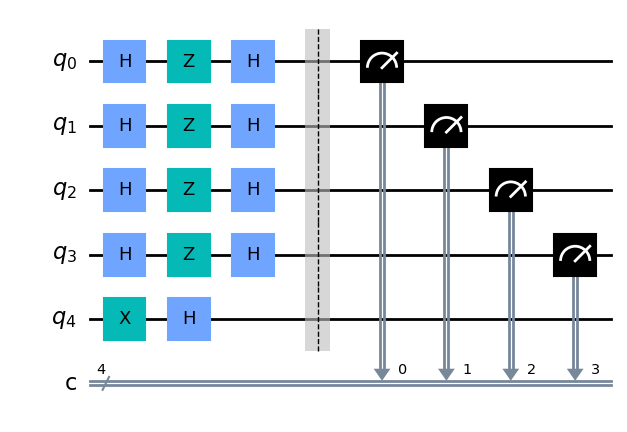

In [4]:
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)

# Add oracle
dj_circuit = dj_circuit.compose(const_oracle)

# Repeat H-gates
for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()

# Measure
for i in range(n):
    dj_circuit.measure(i, i)

# Display circuit
dj_circuit.draw(output='mpl')

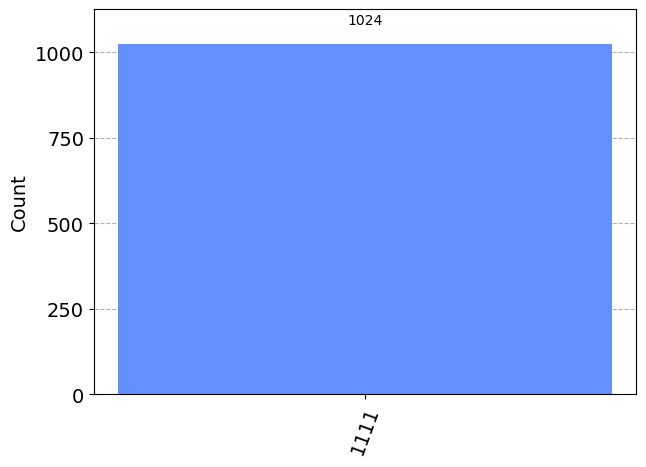

In [5]:
aer_sim = Aer.get_backend('aer_simulator')
results = aer_sim.run(dj_circuit).result()
answer = results.get_counts()

plot_histogram(answer)

In [6]:
# Load our saved IBMQ accounts and get the least busy backend device with greater than or equal to (n+1) qubits
IBMQ.save_account('4c3d00897b7826ff54da08a63c8e03b60bf7f3de5762449cff9ee1324df45ffbe3feaf89bd0d49b67551372b9c084ef694404bbea3fbe4a4b9ec4a1ca34ab63e')
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (n+1) and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

C:\Users\herot\AppData\Local\Temp\ipykernel_17480\457182626.py:2: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.save_account('4c3d00897b7826ff54da08a63c8e03b60bf7f3de5762449cff9ee1324df45ffbe3feaf89bd0d49b67551372b9c084ef694404bbea3fbe4a4b9ec4a1ca34ab63e')
configrc.store_credentials:WARNING:2023-12-05 19:08:48,665: Credentials already present. Set overwrite=True to overwrite.


least busy backend:  ibm_osaka


In [7]:
from qiskit.tools.monitor import job_monitor

transpiled_dj_circuit = transpile(dj_circuit, backend, optimization_level=3)
job = backend.run(transpiled_dj_circuit)
job_monitor(job, interval=2)

Job Status: job has successfully run


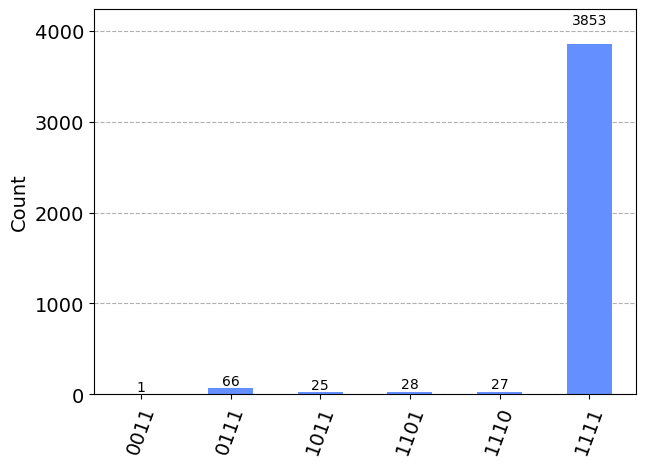

In [8]:
# Get the results of the computation
results = job.result()
answer = results.get_counts()

plot_histogram(answer)